# Implementaion of Regularized Logistic Regression

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

### Cost function for regularized logistic regression
For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $$ 


## Implementaion of cost func for regularized logistic regression

In [186]:
def sigmoid(z):
    g = 1 / (1 + np.exp(- z))
    return g

In [187]:
def cost_func_logistic_reg(X, y, w, b, lambda_ = 1):
    m ,n = X.shape
    cost = 0
    reg = 0
    
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = sigmoid(z)
        loss = -y[i] * np.log(f_wb) - ( 1 - y[i]) * np.log(1 - f_wb)
        cost = cost + loss
    cost = cost / m
    
    for j in range(n):
        reg = reg + w[j] ** 2
    reg = (lambda_/(2* m)) * reg  
    
    total_cost = cost + reg
    
    return total_cost

In [188]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = cost_func_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


## Gradient descent with regularization
The basic algorithm for running gradient descent does not change with regularization, it is:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$
Where each iteration performs simultaneous updates on $w_j$ for all $j$.

What changes with regularization is computing the gradients.

### Computing the Gradient with regularization 
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target

      
* For a <span style="color:red"> **logistic** </span> regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    
The term which adds regularization is  the <span style="color:blue">$\frac{\lambda}{m} w_j $</span>.

In [189]:
def gradient_logistic_reg(X, y, w, b, lambda_):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    reg = np.zeros((n,))
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = sigmoid(z)
        err = f_wb - y[i]
        dj_db = dj_db + err
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
    dj_dw /= m
    dj_db /= m
    for j in range(n):
        reg[j] = (lambda_/m) * w[j]
    dj_dw += reg

    return dj_db, dj_dw

In [190]:
np.random.seed(1)
X_tmp = np.array([[5,2],[2,1],[4, 3], [5, 3]])
y_tmp = np.array([0,0,1, 1])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.46180803292157285
Regularized dj_dw:
 [1.7204799146410867, 0.8226709512514854]


## Implementaion of gradient descent with regularization

In [191]:
def gradient_descent(X, y, w_in, b_in, num_iter, alpha, lambda_):
    w = copy.deepcopy(w_in)
    b = b_in
    J_hist = []
    for i in range(num_iter):
        dj_db, dj_dw = gradient_linear_reg(X, y, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 90000:
            J_hist.append(cost_func_logistic_reg(X, y, w, b, lambda_))
        if i % math.ceil(num_iter/10) == 0:
            print(f'iteration {i:4d} : cost = {J_hist[-1]}')
    return w, b, J_hist

In [195]:
num_iter_tmp = 90000
alpha_tmp = 0.8e-2
w, b, J_hist = gradient_descent(X_tmp, y_tmp, w_tmp, b_tmp, num_iter_tmp, alpha_tmp, lambda_tmp)
print(f'w = {w} , b = {b}')

iteration    0 : cost = 1.5899317589870547
iteration 9000 : cost = 0.48528935821992686
iteration 18000 : cost = 0.4797374260465448
iteration 27000 : cost = 0.47933663890709277
iteration 36000 : cost = 0.4793032929702717
iteration 45000 : cost = 0.4793004082151641
iteration 54000 : cost = 0.47930015582009944
iteration 63000 : cost = 0.47930013366379876
iteration 72000 : cost = 0.47930013171691055
iteration 81000 : cost = 0.4793001315457863
w = [0.17202438 1.07817849] , b = -3.17724108913943


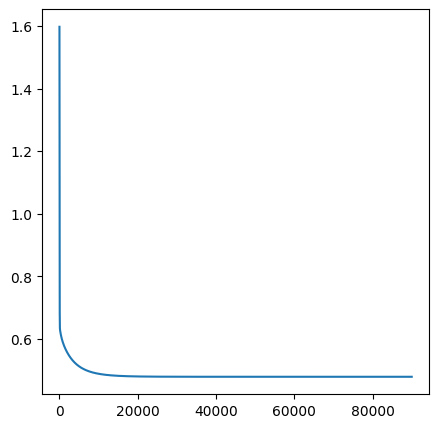

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(J_hist)
plt.show()

In [194]:
m = X_tmp.shape[0]
pre_y = np.zeros((m,))
for i in range(m):
    pre_y[i] = np.dot(X_tmp[i], w) + b
print(pre_y)

[-0.16076321 -1.75486516  0.74540959  0.91739187]
